## Nomor 1: Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


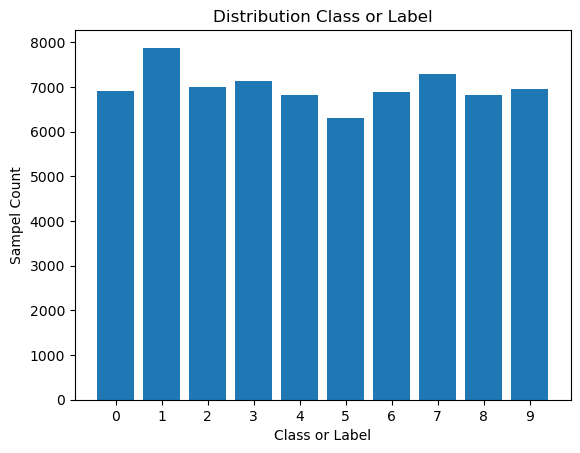

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml



# Mengunduh dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

unique_labels, label_counts = np.unique(mnist.target, return_counts=True)
plt.bar(unique_labels, label_counts)
plt.xlabel('Class or Label')
plt.ylabel('Sampel Count')
plt.title('Distribution Class or Label')
plt.xticks(unique_labels)
plt.show()

### Jumlah data untuk tiap label

In [24]:
# Menghitung jumlah data untuk setiap label (0-9)
label_counts = np.bincount(mnist.target.astype(int))

# Menampilkan jumlah data untuk setiap label
for i in range(10):
    print(f"Data Count for Label {i}: {label_counts[i]}")

Data Count for Label 0: 6903
Data Count for Label 1: 7877
Data Count for Label 2: 6990
Data Count for Label 3: 7141
Data Count for Label 4: 6824
Data Count for Label 5: 6313
Data Count for Label 6: 6876
Data Count for Label 7: 7293
Data Count for Label 8: 6825
Data Count for Label 9: 6958


## Nomor 2: Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

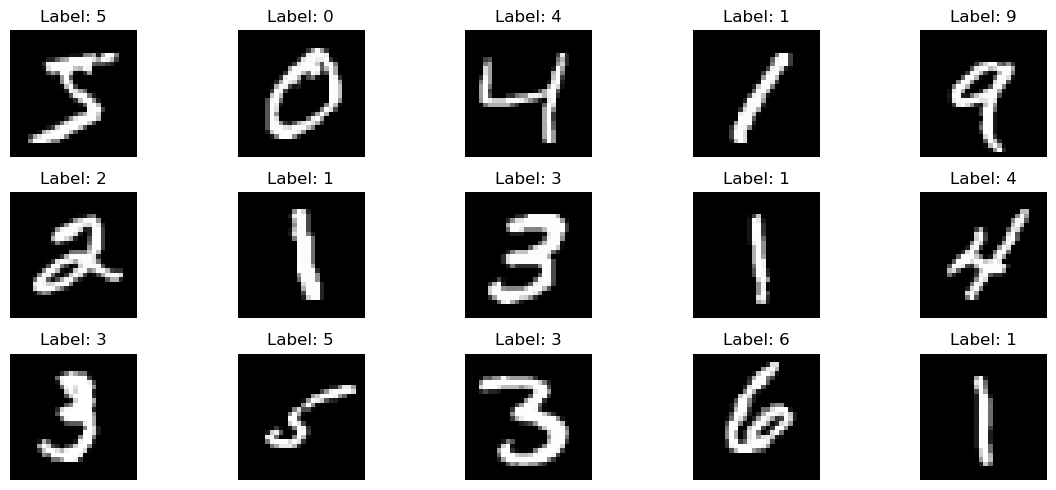

In [25]:
# Mengambil data dan label
X = mnist.data
y = mnist.target

# Menampilkan 15 citra pertama berserta labelnya
plt.figure(figsize=(12, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Nomor 3: Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk

Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

In [26]:
from sklearn.decomposition import PCA

# Menentukan jumlah komponen utama yang diinginkan
n_components = 50  # Misalnya, kita akan menggunakan 50 komponen utama

# Melakukan PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Sekarang, X_pca berisi data yang telah dikurangi dimensinya menggunakan PCA
print("Shape of X_pca:", X_pca.shape)

Shape of X_pca: (70000, 50)


## Nomor 4: Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

### Rasio 70:30

In [27]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi 70% data pelatihan dan 30% data pengujian
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Hasil dari pembagian data
print("Data Train Count:", len(X_train1))
print("Data Test Count:", len(X_test1))

Data Train Count: 49000
Data Test Count: 21000


### Rasio 80:20

In [28]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi 80% data pelatihan dan 20% data pengujian
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Hasil dari pembagian data
print("Data Train Count:", len(X_train2))
print("Data Test Count:", len(X_test2))

Data Train Count: 56000
Data Test Count: 14000


### Rasio 90:10

In [29]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi 90% data pelatihan dan 10% data pengujian
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_pca, y, test_size=0.1, random_state=42)

# Hasil dari pembagian data
print("Data Train Count:", len(X_train3))
print("Data Test Count:", len(X_test3))


Data Train Count: 63000
Data Test Count: 7000


## Nomor 5: Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM

### Naive Bayes

#### Rasio 70:30

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Membuat model Naive Bayes Gaussian
nb_model = GaussianNB()

# Melatih model Naive Bayes menggunakan data pelatihan
nb_model.fit(X_train1, y_train1)

# Menguji model pada data pengujian
y_pred_nb1 = nb_model.predict(X_test1)

# Mengukur akurasi model Naive Bayes
accuracy_nb1 = accuracy_score(y_test1, y_pred_nb1)
print("Accuracy Naive Bayes:", accuracy_nb1)


Accuracy Naive Bayes: 0.8705714285714286


#### Rasio 80:20

In [31]:
# Melatih model Naive Bayes menggunakan data pelatihan
nb_model.fit(X_train2, y_train2)

# Menguji model pada data pengujian
y_pred_nb2 = nb_model.predict(X_test2)

# Mengukur akurasi model Naive Bayes
accuracy_nb2 = accuracy_score(y_test2, y_pred_nb2)
print("Accuracy Naive Bayes:", accuracy_nb2)


Accuracy Naive Bayes: 0.872


#### Rasio 90:10

In [32]:
# Melatih model Naive Bayes menggunakan data pelatihan
nb_model.fit(X_train3, y_train3)

# Menguji model pada data pengujian
y_pred_nb3 = nb_model.predict(X_test3)

# Mengukur akurasi model Naive Bayes
accuracy_nb3 = accuracy_score(y_test3, y_pred_nb3)
print("Accuracy Naive Bayes:", accuracy_nb3)


Accuracy Naive Bayes: 0.8688571428571429


#### Accuracy, Classification, Confusion Matrix: Data Training

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluasi model Naive Bayes terhadap data pelatihan
y_train_pred_nb1 = nb_model.predict(X_train1)
accuracy_train_nb1 = accuracy_score(y_train1, y_train_pred_nb1)
print("Accuracy Naive Bayes (Training):", accuracy_train_nb1)

# Classification report Naive Bayes untuk data pelatihan
print("Classification Report Naive Bayes (Training):\n", classification_report(y_train1, y_train_pred_nb1))

# Confusion matrix Naive Bayes untuk data pelatihan
confusion_matrix_nb_train1 = confusion_matrix(y_train1, y_train_pred_nb1)
print("Confusion Matrix Naive Bayes (Training):\n", confusion_matrix_nb_train1)


Accuracy Naive Bayes (Training): 0.8725306122448979
Classification Report Naive Bayes (Training):
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      4845
           1       0.96      0.94      0.95      5513
           2       0.83      0.85      0.84      4857
           3       0.84      0.83      0.84      4965
           4       0.86      0.86      0.86      4888
           5       0.77      0.85      0.81      4398
           6       0.92      0.92      0.92      4788
           7       0.92      0.86      0.89      5045
           8       0.84      0.84      0.84      4833
           9       0.82      0.83      0.83      4868

    accuracy                           0.87     49000
   macro avg       0.87      0.87      0.87     49000
weighted avg       0.87      0.87      0.87     49000

Confusion Matrix Naive Bayes (Training):
 [[4534    0   43   45    3  127   72    6   10    5]
 [   0 5157  107   26    7   78   29   29   67 

#### Accuracy, Classification, Confusion Matrix: Data Testing

In [34]:
# Evaluasi model Naive Bayes terhadap data pengujian
y_test_pred_nb1 = nb_model.predict(X_test1)
accuracy_test_nb1 = accuracy_score(y_test1, y_test_pred_nb1)
print("\nAccuracy Naive Bayes (Testing):", accuracy_test_nb1)

# Classification report Naive Bayes untuk data pengujian
print("Classification Report Naive Bayes (Testing):\n", classification_report(y_test1, y_test_pred_nb1))

# Confusion matrix Naive Bayes untuk data pengujian
confusion_matrix_nb_test1 = confusion_matrix(y_test1, y_test_pred_nb1)
print("Confusion Matrix Naive Bayes (Testing):\n", confusion_matrix_nb_test1)



Accuracy Naive Bayes (Testing): 0.8710476190476191
Classification Report Naive Bayes (Testing):
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      2058
           1       0.95      0.94      0.95      2364
           2       0.83      0.85      0.84      2133
           3       0.84      0.83      0.83      2176
           4       0.85      0.85      0.85      1936
           5       0.76      0.83      0.80      1915
           6       0.92      0.92      0.92      2088
           7       0.92      0.87      0.90      2248
           8       0.83      0.83      0.83      1992
           9       0.83      0.84      0.83      2090

    accuracy                           0.87     21000
   macro avg       0.87      0.87      0.87     21000
weighted avg       0.87      0.87      0.87     21000

Confusion Matrix Naive Bayes (Testing):
 [[1917    0   13   12    5   67   34    3    5    2]
 [   0 2233   39   13    2   30    3   12   30   

## Nomor 6: Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

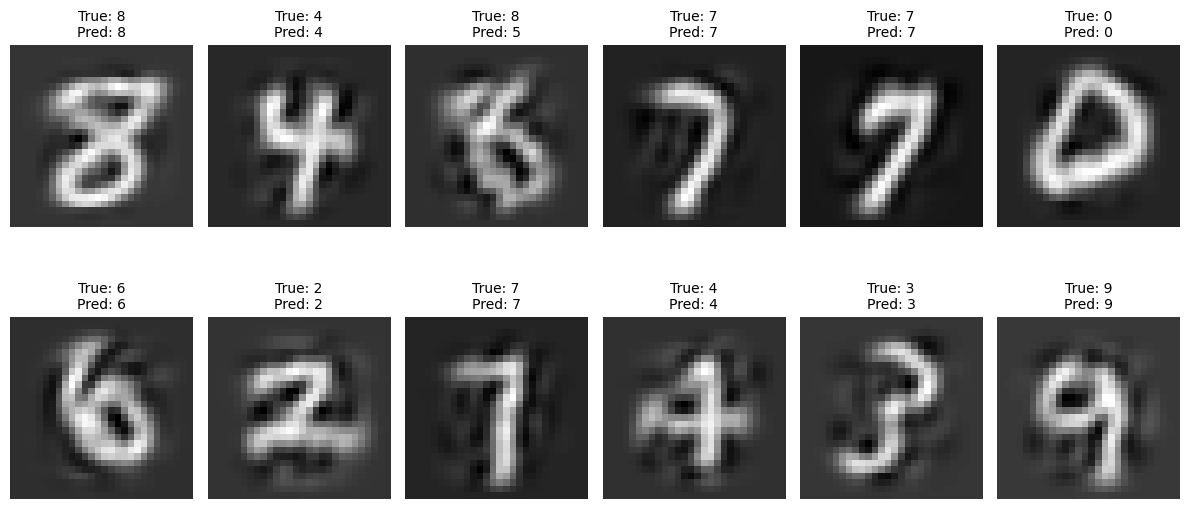

In [35]:
import matplotlib.pyplot as plt

# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 12

# Mengambil sampel data pengujian dan hasil prediksinya
X_samples = X_test1[:n_samples_to_display]
x_restored = pca.inverse_transform(X_test1)
y_true_samples = y_test1[:n_samples_to_display]
y_pred_samples = y_test_pred_nb1[:n_samples_to_display]

# Menampilkan citra berserta hasil prediksi
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(2, 6, i + 1)
    plt.imshow(x_restored[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_true_samples[i]}\nPred: {y_pred_samples[i]}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Bagian Ziedny : Multinominal

In [36]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

In [49]:
# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')


Hasil akurasi data train: 0.8278979591836735
Hasil akurasi data test: 0.8257142857142857


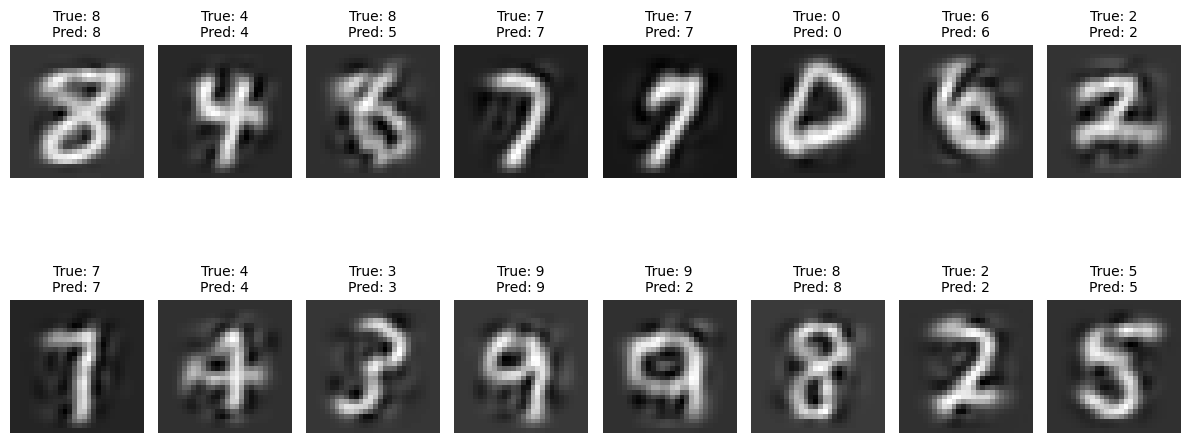

In [52]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 12

# Mengambil sampel data pengujian dan hasil prediksinya
X_samples = X_test1[:n_samples_to_display]
x_restored = pca.inverse_transform(X_test1)
y_true_samples = y_test1[:n_samples_to_display]
y_pred_samples = y_test_pred_nb1[:n_samples_to_display]

# Menampilkan citra berserta hasil prediksi
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(2, 6, i + 1)
    plt.imshow(x_restored[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_true_samples[i]}\nPred: {y_pred_samples[i]}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()